# Exploritive Data Analysis

## Post Length Distribution

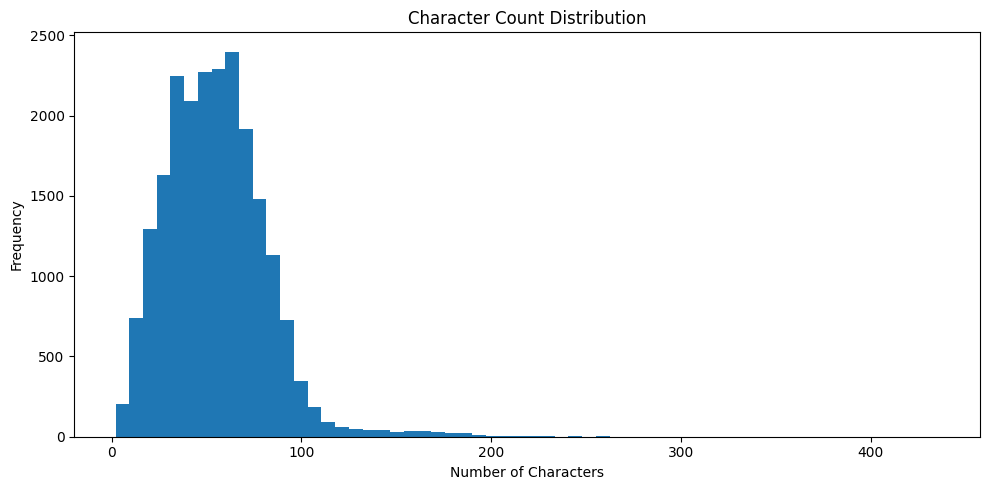

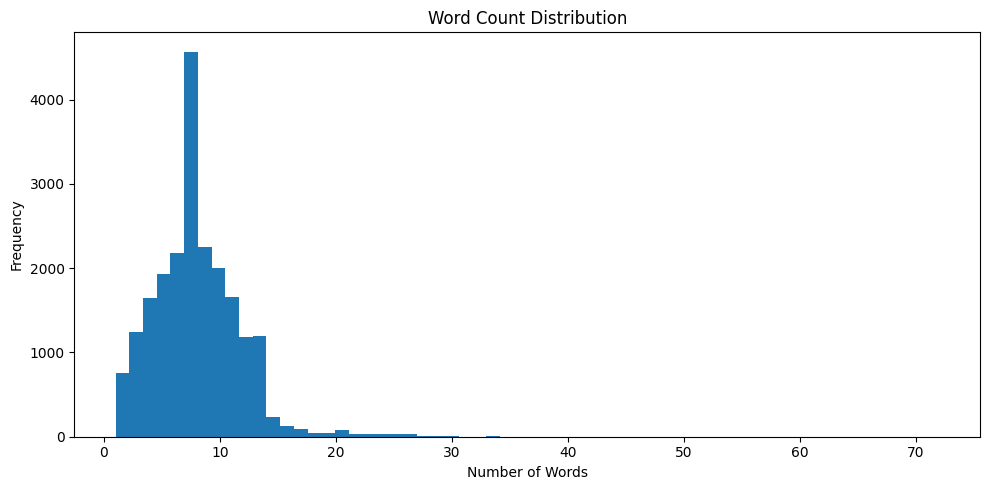

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load cleaned data
df = pd.read_csv('./data/cleaned/hate_speech_dataset.tsv')

# Character count distribution and word count distribution
df["char_count"] = df["cleaned_post"].apply(len)
df["word_count"] = df["cleaned_post"].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10,5))
plt.hist(df["char_count"], bins=60)
plt.title("Character Count Distribution")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
plt.hist(df["word_count"], bins=60)
plt.title("Word Count Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


## Class Distribution

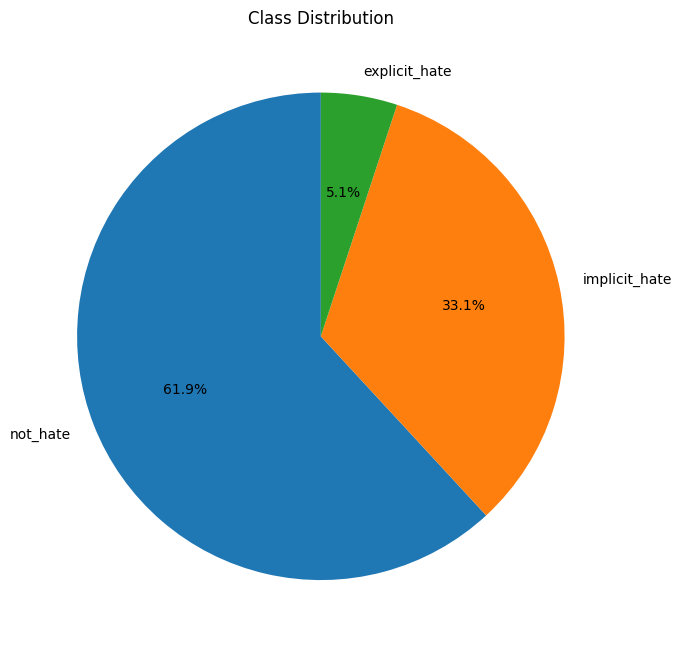

In [ ]:
class_counts = df["class"].value_counts()

plt.figure(figsize=(7,7))
plt.pie(class_counts, labels=class_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Class Distribution")
plt.tight_layout()
plt.show()

# NLP

## Sentiment Analysis

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nibh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


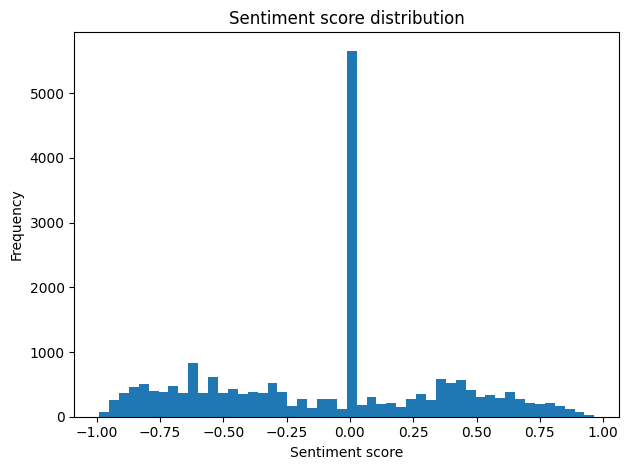

In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['cleaned_post'].apply(lambda x: sid.polarity_scores(x)['compound'])

plt.figure()
plt.hist(df["sentiment_score"], bins=50)
plt.xlabel("Sentiment score")
plt.ylabel("Frequency")
plt.title("Sentiment score distribution")
plt.tight_layout()
plt.show()

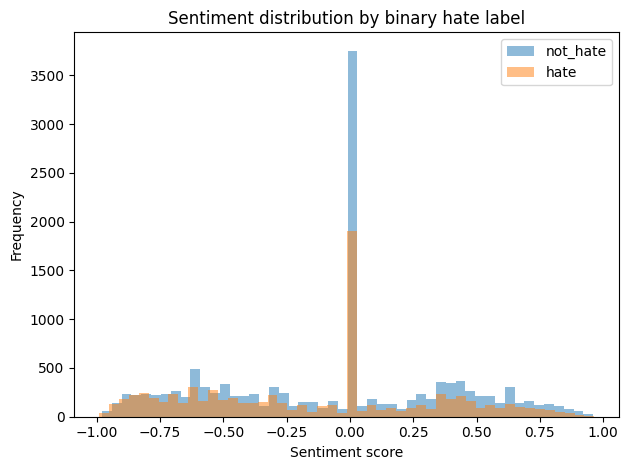

In [11]:
# Binary hate label
plt.figure()
plt.hist(
    df.loc[df["bi_class"] == 0, "sentiment_score"],
    bins=50,
    alpha=0.5,
    label="not_hate"
)
plt.hist(
    df.loc[df["bi_class"] == 1, "sentiment_score"],
    bins=50,
    alpha=0.5,
    label="hate"
)
plt.xlabel("Sentiment score")
plt.ylabel("Frequency")
plt.title("Sentiment distribution by binary hate label")
plt.legend()
plt.tight_layout()
plt.show()

## ENR

In [ ]:
import spacy
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

def extract_entities_with_label(text):
    """Extract entities from text (entity text, entity label)"""
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

# Extract entities from each text
df['entities'] = df['cleaned_post'].apply(extract_entities_with_label)

# Visualize entities for each bi_class group
for cls, group in df.groupby('bi_class'):
    # Flatten the list
    all_entities = [ent for ents in group['entities'] for ent in ents]  # (text, label)
    
    # Top 10 most common entities
    counter = Counter([text for text, label in all_entities])
    top_entities = counter.most_common(10)
    
    # Plot bar chart
    plt.figure(figsize=(10,5))
    sns.barplot(x=[text for text,_ in top_entities],
                y=[count for _,count in top_entities])
    plt.title(f"Top 10 entities for bi_class={cls}")
    plt.xticks(rotation=45)
    plt.ylabel("Count")
    plt.xlabel("Entity")
    plt.show()
    
    # Entity label distribution
    counter_labels = Counter([label for _, label in all_entities])
    labels, counts = zip(*counter_labels.items())
    
    plt.figure(figsize=(6,6))
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f"Entity label distribution for bi_class={cls}")
    plt.show()